# OCR (Optical Character Recognition) from Images with Transformers

---

[Github](https://github.com/eugenesiow/practical-ml/) | More Notebooks @ [eugenesiow/practical-ml](https://github.com/eugenesiow/practical-ml)

---

# Setting up the Environment

#### Dependencies and Runtime

If you're running this notebook in Google Colab, most of the dependencies are already installed and we don't need the GPU for this particular example. 

If you decide to run this on many (>thousands) images and want the inference to go faster though, you can select `Runtime` > `Change Runtime Type` from the menubar. Ensure that `GPU` is selected as the `Hardware accelerator`.

We need to install huggingface `transformers` for this example to run, so execute the command below to setup the dependencies. We use the version compiled directly from the latest source (at the time of writing this is the only way to access the transforemrs TrOCR model code).

In [ ]:
!pip install -q git+https://github.com/huggingface/transformers.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 596 kB 5.2 MB/s 
     |████████████████████████████████| 77 kB 3.3 MB/s 
     |████████████████████████████████| 6.6 MB 42.5 MB/s 
     |████████████████████████████████| 895 kB 57.4 MB/s 


# Using the Model (Running Inference)

Let's define a function for us to get images from the web. We execute this function to download an image with a line of handwritten text and display it.

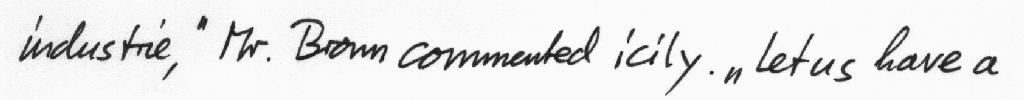

In [ ]:
import requests
from IPython.display import display
from PIL import Image

def show_image(url):
  img = Image.open(requests.get(url, stream=True).raw).convert("RGB")
  display(img)
  return img

handwriting1 = show_image('https://fki.tic.heia-fr.ch/static/img/a01-122-02.jpg')

Now we want to load the model to recognise handwritten text.

Specifically we are running the following steps:

* Load the processor, `TrOCRProcessor`, which processes our input image and converts it into a sequence of fixed-size patches (resolution 16x16), which are linearly embedded. The processor also adds absolute position embeddings and this sequence is fed to the layers of the Transformer encoder.
* Load the model, `VisionEncoderDecoderModel`, which consists of the image encoder and the text decoder.
* Define `ocr_image` function - We define the function for inferencing which takes our `src_img`, the input image we have downloaded. It will then run both the processor and the model inference and produce the output OCR text that has been recognised from the image.

In [ ]:
import transformers
from transformers import TrOCRProcessor, VisionEncoderDecoderModel

processor = TrOCRProcessor.from_pretrained('microsoft/trocr-base-handwritten')
model = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-base-handwritten')

def ocr_image(src_img):
  pixel_values = processor(images=src_img, return_tensors="pt").pixel_values
  generated_ids = model.generate(pixel_values)
  return processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

Downloading:   0%|          | 0.00/228 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.09k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/772 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.03k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.24G [00:00<?, ?B/s]

Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


We now run our `ocr_image` function on the line of handwritten text in the image we have downloaded previously (and stored in `handwriting1`).

In [ ]:
ocr_image(handwriting1)

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


'industry, " Mr. Brown commented icily. " Let us have a'

Lets try on another image with handwritten text.

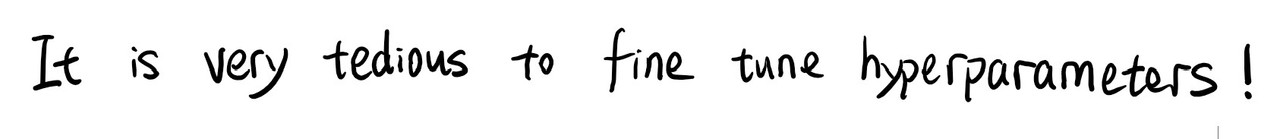

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


'It is very tedious to fine tune hyperparameters!'

In [ ]:
ocr_image(show_image('https://i.postimg.cc/Mp0WtNpX/1.jpg'))

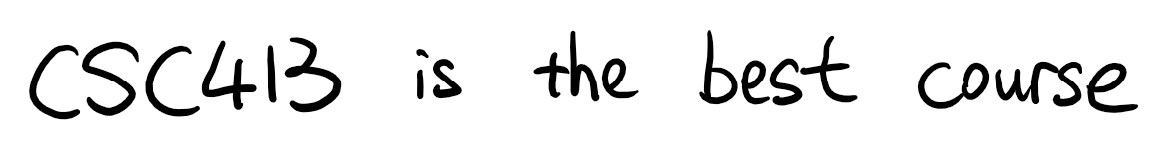

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


'CSC413 is the best course'

In [ ]:
ocr_image(show_image('https://i.postimg.cc/v81xX8FB/2.jpg'))

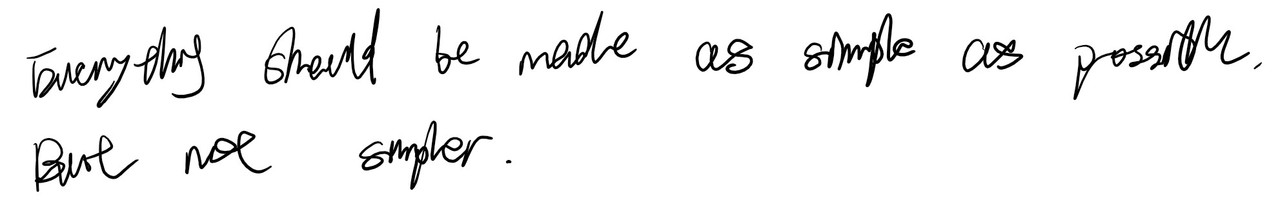

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


'Everything should not make a simple as possible.'

In [ ]:
ocr_image(show_image('https://i.postimg.cc/HsNHpM60/3.jpg'))

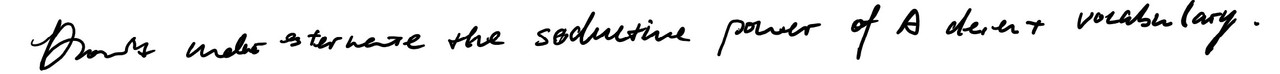

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


"Boris who overcame the seductive power of Aden's vocabulary."

In [ ]:
ocr_image(show_image('https://i.postimg.cc/pLV1Gf3Q/4.jpg'))

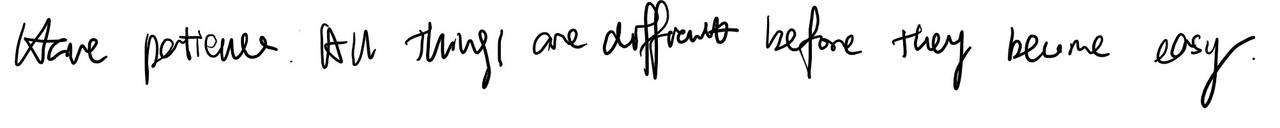

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


'Wave patience, still things are difficult before they become easy.'

In [ ]:
ocr_image(show_image('https://i.postimg.cc/bNVF5DPK/5.jpg'))